In [2]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.so_gaal import SO_GAAL
from pyod.models.mo_gaal import MO_GAAL

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [105]:
# mat_file_list = [
#     'arrhythmia.mat',
#     'breastw.mat',
#     'glass.mat',
#     'ionosphere.mat',
#     'letter.mat',
#     'mammography.mat',
#     'mnist.mat',
#     'satellite.mat'
# ]

# random_state = np.random.RandomState(42)

# df_columns = ['Dataset', '#Samples', '#Dimensions', '%Outliers',
#               'KNN', 'PCA', 'OCSVM', 'LOF', 'HBOS', 'IFOREST', 'SO_GAAL', 'MO_GAAL']
# roc_df = pd.DataFrame(columns=df_columns)
# prn_df = pd.DataFrame(columns=df_columns)
# time_df = pd.DataFrame(columns=df_columns)


# for mat_file in mat_file_list:
#     print("\n... Processing", mat_file, '...')
#     mat = loadmat(os.path.join('datasets', 'odds', mat_file))

#     X = mat['X']
#     y = mat['y'].ravel()
#     outliers_fraction = np.count_nonzero(y) / len(y)
#     outliers_percentage = round(outliers_fraction * 100, ndigits=4)

#     # construct containers for saving results
#     roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
#     prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
#     time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

#     # 75% data for training and 25% for testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
#                                                         random_state=random_state)

#     # standardizing data for processing, mean=0, var=1
#     X_train_norm, X_test_norm = standardizer(X_train, X_test)

#     classifiers = {
#         'k-Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
#         'Principal Component Analysis (PCA)': PCA(
#             contamination=outliers_fraction,
#             random_state=random_state
#         ),
#         'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
#         'Local Outlier Factor (LOF)': LOF(contamination=outliers_fraction),
#         'Histogram-Based Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
#         'Isolation Forest': IForest(
#             contamination=outliers_fraction,
#             random_state=random_state
#         ),
#         'Single-Objective Generative Adversarial Active Learning (SO-GAAL)': SO_GAAL(contamination=outliers_fraction),
#         'Multiple-Objective Generative Adversarial Active Learning (MO-GAAL)': MO_GAAL(contamination=outliers_fraction)
#     }

#     for clf_name, clf in classifiers.items():
#         t0 = time()
#         clf.fit(X_train_norm)
#         test_scores = clf.decision_function(X_test_norm)
#         t1 = time()
#         duration = round(t1 - t0, ndigits=4)
#         time_list.append(duration)

#         roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
#         prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

#         print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
#               'execution time: {duration}s'.format(
#             clf_name=clf_name, roc=roc, prn=prn, duration=duration))

#         roc_list.append(roc)
#         prn_list.append(prn)

#     temp_df = pd.DataFrame(time_list).transpose()
#     temp_df.columns = df_columns
#     time_df = pd.concat([time_df, temp_df], axis=0)

#     temp_df = pd.DataFrame(roc_list).transpose()
#     temp_df.columns = df_columns
#     roc_df = pd.concat([roc_df, temp_df], axis=0)

#     temp_df = pd.DataFrame(prn_list).transpose()
#     temp_df.columns = df_columns
#     prn_df = pd.concat([prn_df, temp_df], axis=0)

## Представление многомерных данных из датасета

In [280]:
# import numpy as np
# from sklearn.manifold import TSNE
# from pyod.utils.data import get_outliers_inliers
# import tqdm

# after_tsne = dict()

# # for mat_file in tqdm.tqdm(mat_file_list):
# for mat_file in tqdm.tqdm(['breastw.mat']):
#     mat = loadmat(os.path.join('datasets', 'odds', mat_file))

#     X = mat['X']
#     y = mat['y'].ravel()

#     X_embedded = TSNE(n_components=2).fit_transform(X)

#     X_out, X_in = get_outliers_inliers(X_embedded, y)
#     after_tsne[mat_file] = (X_out, X_in)

In [ ]:
# fig = plt.figure(figsize=(13, 13))
# for i, mat_file in enumerate(mat_file_list):
#     fig.add_subplot("33{}".format(i + 1))
#     X_out, X_in = after_tsne[mat_file]
#     if i > 4:
#         plt.scatter(X_in[:, 0], X_in[:, 1], color='blue', marker='^', alpha=0.05)
#         plt.scatter(X_out[:, 0], X_out[:, 1], color='orange', marker='h', alpha=0.4)
#     else:
#         plt.scatter(X_in[:, 0], X_in[:, 1], color='blue', marker='^', alpha=0.4)
#         plt.scatter(X_out[:, 0], X_out[:, 1], color='orange', marker='h', alpha=0.5)
#     plt.title(mat_file[:-4])
# fig.legend(labels=['Нормальные данные', 'Аномальные данные'],
#            loc=9, borderaxespad=1.5, title="Обозначения", shadow=True, ncol=3, fontsize=12)
# plt.subplots_adjust(hspace=0.3)
# # plt.show()
# plt.savefig('images/2d_comparison.png', dpi=100)

## Таблицы для Latex'a

In [11]:
# tmp = roc_df.copy()
# for col in df_columns[3:]:
#     tmp[col] = tmp[col].astype(float).round(4)
# tmp

In [12]:
# tmp_cols = ['Dataset']
# tmp_cols.extend(list(df_columns[4:-2]))
# print(tmp[tmp_cols].to_latex(index=False))

In [13]:
# print(tmp[df_columns[:4]].to_latex(index=False))

## Зависимость ROC-значения от сложности алгоритма

In [9]:
# from adjustText import adjust_text

# models = df_columns[4:]

# # ROC vs Time
# fig = plt.figure(figsize=(15, 20))
# for i, mat_file in enumerate(mat_file_list):
#     fig.add_subplot("42{}".format(i + 1))
#     data_title = mat_file[:-4]
#     x = time_df[time_df['Dataset'] == data_title]
#     y = roc_df[roc_df['Dataset'] == data_title]
    
#     data_x = x[models].values[0][:-2]
#     data_y = y[models].values[0][:-2]
    
#     plt.title(
#         "Датасет: {},\nКол-во объектов: {}, Размерность: {}".format(
#             data_title,
#             x[df_columns[1]][0],
#             x[df_columns[2]][0]
#         ),
#         fontsize=15
#     )
#     plt.scatter(data_x, data_y, marker='*', color='blue')
#     plt.xlabel("Время, с", fontsize=13)
#     plt.ylabel("ROC", fontsize=13)
#     texts = [plt.text(data_x[i], data_y[i], models[i], size=12) for i in range(len(models)-2)]
#     adjust_text(texts)
# plt.subplots_adjust(hspace=0.4, wspace=0.3)
# # plt.show()
# plt.savefig('images/roc_vs_time.png', dpi=100)

In [103]:
# plt.figure(figsize=(15,8))

# datasets = list(map(lambda x: x[:-4], mat_file_list))
# for model in models[:-2]:
#     y = roc_df[model].astype(float)
#     plt.plot(datasets, y, label=model, marker='*', markersize=10)
# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                 mode="expand", borderaxespad=0, ncol=3,
#                 title="Датасеты", shadow=True, fontsize=12)
# plt.ylabel('ROC', fontsize=14)
# plt.xticks(fontsize=15, rotation=20)
# # plt.show()
# plt.savefig('images/roc_vs_dataset.png', dpi=100)

## Детальное рассмотрение работы алгоритмов

In [413]:
# classifiers_demo = list()
# data_demo = list()
# random_state = np.random.RandomState(42)

# for i, mat_file in tqdm.tqdm(enumerate(mat_file_list)):
#     mat = loadmat(os.path.join('datasets', 'odds', mat_file))
#     tmp = [mat_file[:-4]]

#     X = mat['X']
#     y = mat['y'].ravel()
#     X_embedded = TSNE(n_components=2).fit_transform(X)
#     tmp.append(X_embedded)

#     outliers_fraction = np.count_nonzero(y) / len(y)

#     b = np.arange(X.shape[0]).reshape((X.shape[0], 1))
#     X = np.hstack((X, b))
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
#                                                         random_state=random_state)
#     train_ids = X_train[:, -1].astype(int)
#     X_train = X_train[:, :-1]
#     test_ids = X_test[:, -1].astype(int)
#     X_test = X_test[:, :-1]

#     # standardizing data for processing, mean=0, var=1
#     X_train_norm, X_test_norm = standardizer(X_train, X_test)

#     classifiers_demo = [
#         ('Isolation Forest', IForest(contamination=outliers_fraction, random_state=random_state)),
#         ('k-Nearest Neighbors', KNN(contamination=outliers_fraction)),
#         ('k-Nearest Neighbors', KNN(contamination=outliers_fraction)),
#         ('k-Nearest Neighbors', KNN(contamination=outliers_fraction)),
#         ('k-Nearest Neighbors', KNN(contamination=outliers_fraction)),
#         ('Principal Component Analysis', PCA(contamination=outliers_fraction, random_state=random_state)),
#         ('Principal Component Analysis', PCA(contamination=outliers_fraction, random_state=random_state)),
#         ('Histogram-Based Outlier Detection', HBOS(contamination=outliers_fraction))
#     ]
    
#     clf_name, clf = classifiers_demo[i]
#     tmp.append(clf_name)
#     clf.fit(X_train_norm)
#     test_scores = clf.decision_function(X_test_norm)
#     roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
#     y_test_predicted = clf.predict(X_test_norm)

#     tmp.append(roc)
#     tmp.append(test_ids)
#     tmp.append(y_test)
#     tmp.append(y_test_predicted)
#     data_demo.append(tmp)

In [414]:
# for i, tmp in enumerate(data_demo):
#     fig = plt.figure(figsize=(10, 4))
#     data_title, X_embedded, clf_name, roc, test_ids, y_test, y_test_predicted = tmp

#     fig.add_subplot(1, 2, 1)
#     X_out, X_in = X_embedded[test_ids[y_test == 1]], X_embedded[test_ids[y_test == 0]]
#     plt.scatter(X_in[:, 0], X_in[:, 1], color='blue', marker='^', alpha=0.4)
#     plt.scatter(X_out[:, 0], X_out[:, 1], color='orange', marker='h', alpha=0.5)
#     plt.title('Ground truth')

#     fig.add_subplot(1, 2, 2)
#     X_out, X_in = X_embedded[test_ids[y_test_predicted == 1]], X_embedded[test_ids[y_test_predicted == 0]]
#     plt.scatter(X_in[:, 0], X_in[:, 1], color='blue', marker='^', alpha=0.4)
#     plt.scatter(X_out[:, 0], X_out[:, 1], color='orange', marker='h', alpha=0.5)
#     plt.title('Predicted')

#     sptl = plt.suptitle("Датасет: {}, ROC: {}\nАлгоритм: {}".format(data_title, roc, clf_name), y=1.08, fontsize=14)
#     lgd = plt.legend(labels=['Нормальные данные', 'Аномальные данные'], title="Обозначения",
#                shadow=True, ncol=1, fontsize=12,
#                loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.savefig('images/{}.png'.format(data_title), dpi=100, bbox_extra_artists=(lgd,sptl), bbox_inches='tight')
# #     plt.show()

## .mat -> .csv

In [522]:
# for mat_file in mat_file_list:
#     print("\n... Processing", mat_file, '...')
#     mat = loadmat(os.path.join('datasets', 'odds', mat_file))

#     X = mat['X']
#     y = mat['y'].ravel()
    
#     tmp = pd.concat([pd.DataFrame(mat['y'], columns=['y']),
#                      pd.DataFrame(mat['X'])],
#                     axis=1)
#     tmp.to_csv('{}.csv'.format(mat_file[:-4]))

In [523]:
# # Glass
# mat_file = 'glass.mat'
# mat = loadmat(os.path.join('datasets', 'odds', mat_file))

# X = mat['X']
# y = mat['y'].ravel()

# tmp = pd.concat([pd.DataFrame(mat['y'], columns=['y']),
#                  pd.DataFrame(mat['X'], columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])],
#                 axis=1)
# tmp.to_csv('{}.csv'.format(mat_file[:-4]))
# # tmp

## SO_GAAL / MO_GAAL

In [3]:
from pyod.models.mo_gaal import MO_GAAL
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

contamination = 0.1  # percentage of outliers
n_train = 30000  # number of training points
n_test = 3000  # number of testing points
n_features = 2  # number of features

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf_name = 'MO_GAAL'
clf = MO_GAAL(contamination=contamination, stop_epochs=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

Using TensorFlow backend.


Epoch 1 of 6

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:

Testing for epoch 1 index 3:

Testing for epoch 1 index 4:

Testing for epoch 1 index 5:

Testing for epoch 1 index 6:

Testing for epoch 1 index 7:

Testing for epoch 1 index 8:

Testing for epoch 1 index 9:

Testing for epoch 1 index 10:

Testing for epoch 1 index 11:

Testing for epoch 1 index 12:

Testing for epoch 1 index 13:

Testing for epoch 1 index 14:

Testing for epoch 1 index 15:

Testing for epoch 1 index 16:

Testing for epoch 1 index 17:

Testing for epoch 1 index 18:

Testing for epoch 1 index 19:

Testing for epoch 1 index 20:

Testing for epoch 1 index 21:

Testing for epoch 1 index 22:

Testing for epoch 1 index 23:

Testing for epoch 1 index 24:

Testing for epoch 1 index 25:

Testing for epoch 1 index 26:

Testing for epoch 1 index 27:

Testing for epoch 1 index 28:

Testing for epoch 1 index 29:

Testing for epoch 1 index 30:

Testing for epoch 1 index 31:

Testing for epoch 1 index 32:

Tes

500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 10:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 11:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 12:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 13:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 14:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 15:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 16:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 17:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 18:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 19:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 20:
500/500 [==============================] - 0s

500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 24:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 25:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 26:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 27:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 28:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 29:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 30:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 31:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 32:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 33:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 34:
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 38:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 39:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 40:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 41:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 42:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 43:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 44:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 45:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 46:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 47:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 48:
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 52:
500/500 [==============================] - 0s 9us/step

Testing for epoch 3 index 53:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 54:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 55:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 56:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 57:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 58:
500/500 [==============================] - 0s 10us/step

Testing for epoch 3 index 59:
500/500 [==============================] - 0s 11us/step

Testing for epoch 3 index 60:
500/500 [==============================] - 0s 10us/step
Epoch 4 of 6

Testing for epoch 4 index 1:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 2:
500/500 [=========================

500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 6:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 7:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 8:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 9:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 10:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 11:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 12:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 13:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 14:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 15:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 16:
500/500 [==============================] - 0s 11

500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 19:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 20:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 21:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 22:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 23:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 24:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 25:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 26:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 27:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 28:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 29:
500/500 [==============================] - 0s

500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 33:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 34:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 35:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 36:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 37:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 38:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 39:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 40:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 41:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 42:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 43:
500/500 [==============================] - 0

500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 47:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 48:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 49:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 50:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 51:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 52:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 53:
500/500 [==============================] - 0s 9us/step

Testing for epoch 4 index 54:
500/500 [==============================] - 0s 11us/step

Testing for epoch 4 index 55:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 56:
500/500 [==============================] - 0s 10us/step

Testing for epoch 4 index 57:
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 10us/step
Epoch 5 of 6

Testing for epoch 5 index 1:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 2:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 3:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 4:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 5:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 6:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 7:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 8:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 9:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 10:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 11:
500/500 [==============================] 

500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 15:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 16:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 17:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 18:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 19:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 20:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 21:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 22:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 23:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 24:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 25:
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 29:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 30:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 31:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 32:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 33:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 34:
500/500 [==============================] - 0s 12us/step

Testing for epoch 5 index 35:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 36:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 37:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 38:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 39:
500/500 [==============================] - 0s

500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 43:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 44:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 45:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 46:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 47:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 48:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 49:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 50:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 51:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 52:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 53:
500/500 [==============================] - 0

500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 57:
500/500 [==============================] - 0s 11us/step

Testing for epoch 5 index 58:
500/500 [==============================] - 0s 10us/step

Testing for epoch 5 index 59:
500/500 [==============================] - 0s 9us/step

Testing for epoch 5 index 60:
500/500 [==============================] - 0s 10us/step
Epoch 6 of 6

Testing for epoch 6 index 1:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 2:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 3:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 4:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 5:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 6:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 7:
500/500 [==============================

500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 10:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 11:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 12:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 13:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 14:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 15:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 16:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 17:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 18:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 19:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 20:
500/500 [==============================] - 0s 1

500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 24:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 25:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 26:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 27:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 28:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 29:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 30:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 31:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 32:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 33:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 34:
500/500 [==============================] - 0

500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 38:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 39:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 40:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 41:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 42:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 43:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 44:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 45:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 46:
500/500 [==============================] - 0s 12us/step

Testing for epoch 6 index 47:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 48:
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 52:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 53:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 54:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 55:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 56:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 57:
500/500 [==============================] - 0s 9us/step

Testing for epoch 6 index 58:
500/500 [==============================] - 0s 10us/step

Testing for epoch 6 index 59:
500/500 [==============================] - 0s 11us/step

Testing for epoch 6 index 60:
500/500 [==============================] - 0s 11us/step

On Training Data:
MO_GAAL ROC:0.5459, precision @ rank n:0.5233

On Test Data:
MO_GAAL ROC:0.5069, precision @ rank n:0.4324


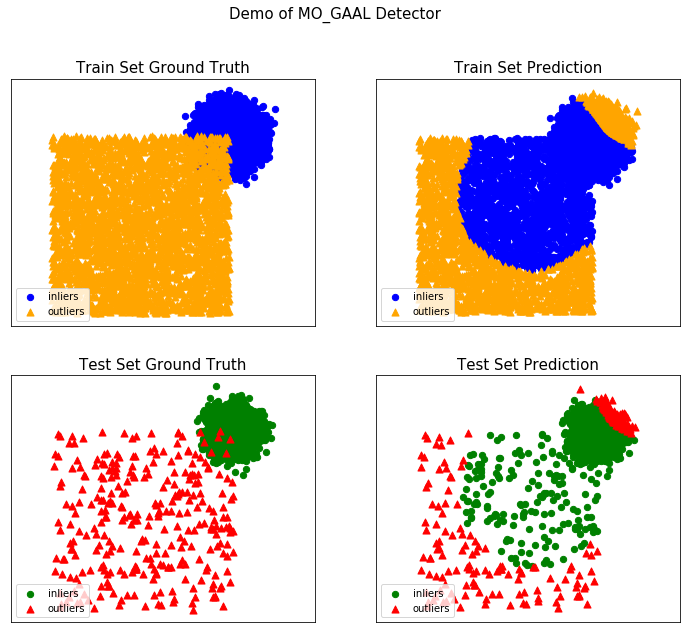

In [4]:
from pyod.utils.example import visualize

# visualize(clf_name,
#           X_train[:, :2], y_train,
#           X_test[:, :2], y_test,
#           y_train_pred, y_test_pred,
#           show_figure=True, save_figure=False)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [119]:
from pyod.models.so_gaal import SO_GAAL
from pyod.utils.data import evaluate_print, generate_data

X_train, y_train, X_test, y_test = generate_data(n_train=200, n_test=100,
                                                 n_features=2, contamination=0.2)

clf_name = 'SO_GAAL'
clf = SO_GAAL()
clf.fit(X_train)

# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

Epoch 1 of 60

Testing for epoch 1 index 1:

On Training Data:
SO_GAAL ROC:0.1872, precision @ rank n:0.15

On Test Data:
SO_GAAL ROC:0.1488, precision @ rank n:0.05


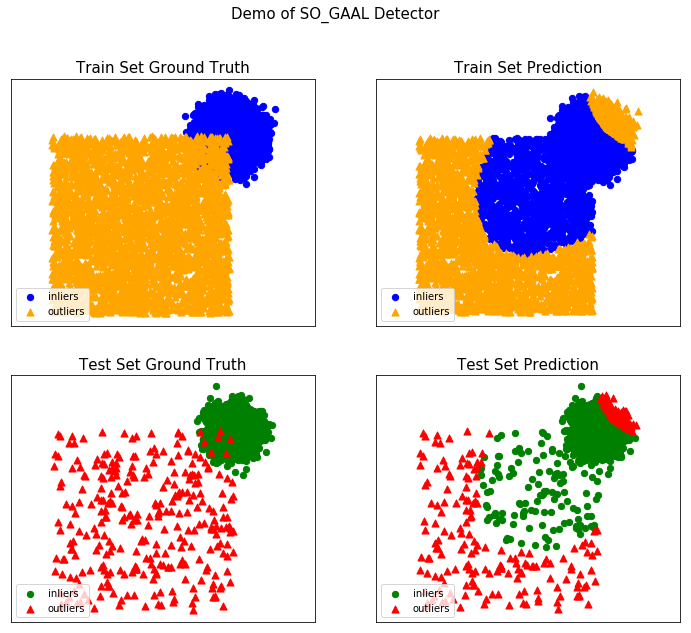

In [11]:
from pyod.utils.example import visualize

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [ ]:
plt.figure(figsize=(15, 12))

scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
threshold = percentile(scores_pred, 100 * outliers_fraction)
n_errors = (y_pred != ground_truth).sum()
# plot the levels lines and the points

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
subplot = plt.subplot(3, 4, i + 1)
subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                 cmap=plt.cm.Blues_r)
a = subplot.contour(xx, yy, Z, levels=[threshold],
                    linewidths=2, colors='red')
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                 colors='orange')
b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
subplot.axis('tight')
subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='lower right')
subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
subplot.set_xlim((-7, 7))
subplot.set_ylim((-7, 7))

plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
plt.suptitle("Outlier detection")
plt.show()

In [113]:
from pyod.models.knn import KNN   # kNN detector
from pyod.utils.data import evaluate_print, generate_data

X_train, y_train, X_test, y_test = generate_data(n_train=200, n_test=100,
                                                 n_features=2, contamination=0.2)

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.8839, precision @ rank n:0.7

On Test Data:
KNN ROC:0.9438, precision @ rank n:0.8


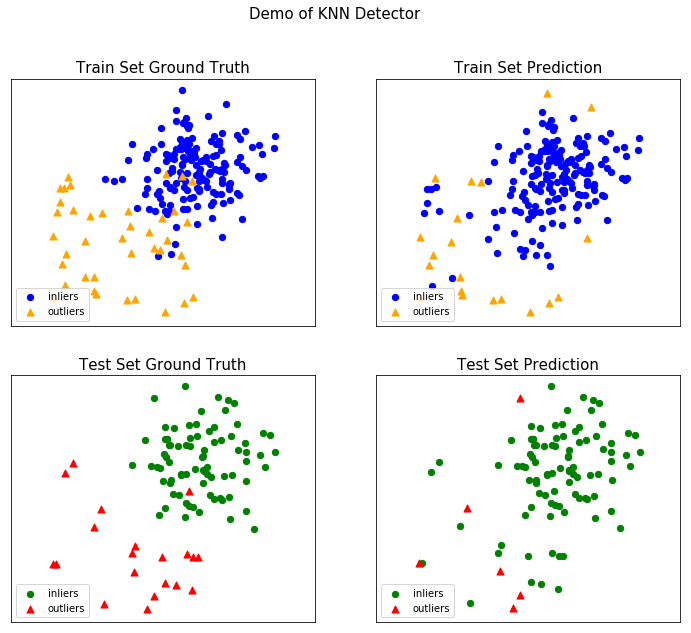

In [115]:
from pyod.utils.example import visualize

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [79]:
X_train_norm, X_test_norm = standardizer(X_train, X_test)

In [80]:
clf_name, clf = ['Isolation Forest',
                 IForest(contamination=outliers_fraction, random_state=random_state)]

clf.fit(X_train_norm)
test_scores = clf.decision_function(X_test_norm)

roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

print('{clf_name} ROC:{roc}, precision @ rank n:{prn}'.format(clf_name=clf_name, roc=roc, prn=prn))

Isolation Forest ROC:0.9733, precision @ rank n:0.7


In [98]:
clf.predict(X_test_norm[:10])

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [96]:
clf.predict_proba(X_test_norm[:10], method='unify')

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.89086876, 0.10913124],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.45691057, 0.54308943],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [81]:
clf.predict_proba(X_test_norm)

array([[0.9533114 , 0.0466886 ],
       [0.86425022, 0.13574978],
       [0.75418067, 0.24581933],
       [0.86354695, 0.13645305],
       [0.8570558 , 0.1429442 ],
       [0.87415439, 0.12584561],
       [0.94814323, 0.05185677],
       [0.6164816 , 0.3835184 ],
       [0.91709132, 0.08290868],
       [0.94487256, 0.05512744],
       [0.86511712, 0.13488288],
       [0.50731664, 0.49268336],
       [0.76362364, 0.23637636],
       [0.8205121 , 0.1794879 ],
       [0.93906991, 0.06093009],
       [0.91967204, 0.08032796],
       [0.82628898, 0.17371102],
       [0.88156937, 0.11843063],
       [0.89010898, 0.10989102],
       [0.89987263, 0.10012737],
       [0.96734497, 0.03265503],
       [0.95092351, 0.04907649],
       [0.91762442, 0.08237558],
       [0.93509042, 0.06490958],
       [0.91449328, 0.08550672],
       [0.26309336, 0.73690664],
       [0.66281329, 0.33718671],
       [0.91012464, 0.08987536],
       [0.93863431, 0.06136569],
       [0.92327983, 0.07672017],
       [0.

In [ ]:
roc_auc_score(y_true, y_scores)

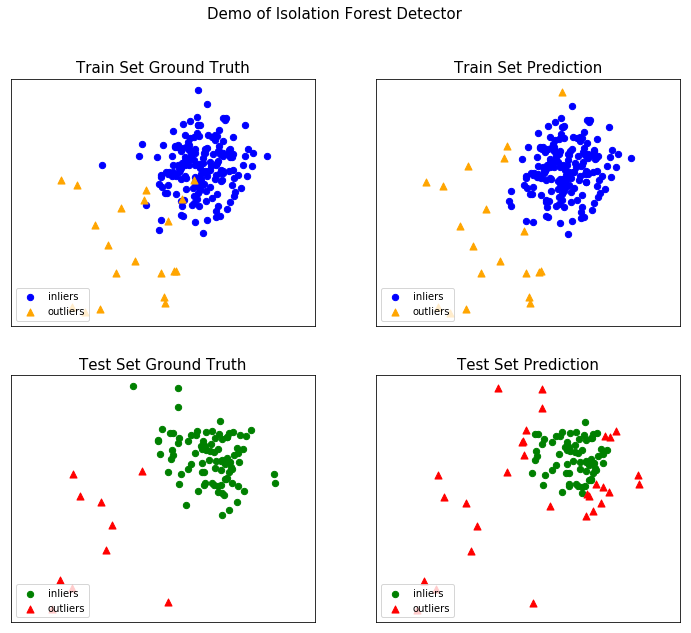

In [75]:
y_test_pred = clf.predict(X_test_norm)  # outlier labels (0 or 1)
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)